# FINAL PROJECT: SEARCHING FOR SIMILAR CITIES

### Installing Packages and Importing Libraries

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Sol

### Reading in data and data wrangling

In [3]:
US_df = pd.read_csv('final_US_data.csv')
#US_df.drop(['city_ascii', 'iso2','iso3','capital','id'], axis=1,inplace=True)
#US_df.columns=['city', 'lat', 'long', 'country','state','population']
US_df.head()

,City,lat,Long,State,population,pop density (people/sq mi),Land Area (sq mi),City Radius (km)
0,New York,40.6943,-73.9249,New York,19354922,28211,303,15.805061
1,Los Angeles,34.1139,-118.4068,California,12815475,8484,469,19.663521
2,Chicago,41.8373,-87.6862,Illinois,8675982,11883,228,13.710152
3,Miami,25.7839,-80.2102,Florida,6381966,12645,36,5.447862
4,Houston,29.7869,-95.3905,Texas,5446468,3842,600,22.240804


In [4]:
# The US actually has 7000+ cities, but this makes the map 
# look too cluttered.
# So I narrowed it to the top 100 by population size 
# which represents all cities with ~430K+ people
US_df=US_df.sort_values('population', ascending=False).iloc[0:100,:]
US_df.head()

,City,lat,Long,State,population,pop density (people/sq mi),Land Area (sq mi),City Radius (km)
0,New York,40.6943,-73.9249,New York,19354922,28211,303,15.805061
1,Los Angeles,34.1139,-118.4068,California,12815475,8484,469,19.663521
2,Chicago,41.8373,-87.6862,Illinois,8675982,11883,228,13.710152
3,Miami,25.7839,-80.2102,Florida,6381966,12645,36,5.447862
5,Dallas,32.7936,-96.7662,Texas,5733259,3870,341,16.766872


### Walking through the data

In [5]:
# creating summary statistics 
US_summary=US_df.describe(include='all')
US_summary['pop']=US_df["population"].describe().apply(lambda x: format(x, '.2f'))
US_summary.drop('population',axis=1, inplace=True)
round(US_summary,2)

,City,lat,Long,State,pop density (people/sq mi),Land Area (sq mi),City Radius (km),pop
count,100,100.00,100.00,100,100.00,100.00,100.00,100.00
unique,100,NaN,NaN,37,NaN,NaN,NaN,NaN
top,Houston,NaN,NaN,California,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,14,NaN,NaN,NaN,NaN
mean,NaN,36.87,-92.91,NaN,4660.24,147.91,9.97,1817325.21
std,NaN,4.85,16.13,NaN,3903.29,144.84,4.78,2616741.97
min,NaN,25.78,-122.65,NaN,1016.00,7.00,2.40,404525.00
25%,NaN,33.60,-106.48,NaN,2388.50,49.50,6.39,572260.00
50%,NaN,37.42,-87.24,NaN,3484.50,104.50,9.28,894459.50
75%,NaN,40.85,-80.36,NaN,5446.50,179.75,12.17,1830098.75


<Figure size 1152x1440 with 0 Axes>

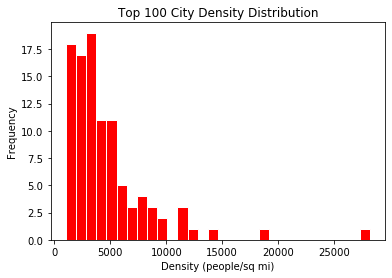

<Figure size 1152x1440 with 0 Axes>

In [6]:
x=US_df['pop density (people/sq mi)']
plt.hist(x, density=False, bins=30, ec='white', color='red')  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Density (people/sq mi)');
plt.title('Top 100 City Density Distribution')
plt.figure(figsize=(16,20))


<Figure size 1152x1440 with 0 Axes>

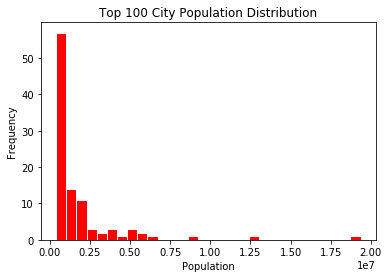

<Figure size 1152x1440 with 0 Axes>

In [7]:
x=US_df['population']
plt.hist(x, density=False, bins=30, ec='white', color='red')  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Population');
plt.title('Top 100 City Population Distribution')
plt.figure(figsize=(16,20))


<Figure size 1152x1440 with 0 Axes>

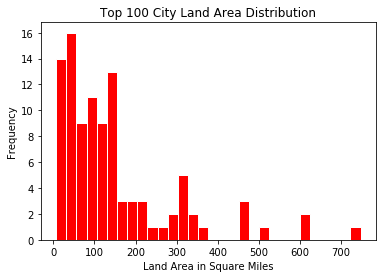

<Figure size 1152x1440 with 0 Axes>

In [8]:
x=US_df['Land Area (sq mi)']
plt.hist(x, density=False, bins=30, ec='white', color='red')  # `density=False` would make counts
plt.ylabel('Frequency')
plt.xlabel('Land Area in Square Miles');
plt.title('Top 100 City Land Area Distribution')
plt.figure(figsize=(16,20))




In [9]:
US_df.count()

City                          100
lat                           100
Long                          100
State                         100
population                    100
pop density (people/sq mi)    100
Land Area (sq mi)             100
City Radius (km)              100
dtype: int64

### Creating prelimary map of the US cities

In [9]:
address = 'United States'

geolocator = Nominatim(user_agent="US_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the USA are 39.7837304, -100.4458825.


In [10]:
# create map of US using latitude and longitude values
map_US = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, city, state in zip(US_df['lat'], US_df['Long'], US_df['City'], US_df['State']):
    label = '{}, {}'.format(city, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_US)  
    
map_US

### Requesting venue data from Foursquare

In [11]:
CLIENT_ID = 'OWGJFJUADTFGCNEVZIY2IMYJXZEQKQQNRLM3W3NIDJWTDXQW' # your Foursquare ID
CLIENT_SECRET = 'JZ1NECUMID0POWK1MXXGI13XEQVOJFCIDKONQJXL3BVFHW54' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OWGJFJUADTFGCNEVZIY2IMYJXZEQKQQNRLM3W3NIDJWTDXQW
CLIENT_SECRET:JZ1NECUMID0POWK1MXXGI13XEQVOJFCIDKONQJXL3BVFHW54


In [12]:
# radius is set to 22500 meters since that is the median radius of US cities above 430K in population
# comparing using top 100 venues in each city (change to 1000?)
LIMIT = 100;

def getNearbyVenues(names, latitudes, longitudes, rad):
    
    venues_list=[]
    i=1
    for name, lat, lng, rad in zip(names, latitudes, longitudes, rad):
        print(i,name)
        i=i+1
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rad*1000, 
            LIMIT)
        
    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
# calling above function to create dataframe of results
US_city_venues = getNearbyVenues(names=US_df['City'],
                                   latitudes=US_df['lat'],
                                   longitudes=US_df['Long'], 
                                 rad=US_df['City Radius (km)']
                                  )
print('Done')

1 New York
2 Los Angeles
3 Chicago
4 Miami
5 Dallas
6 Philadelphia
7 Houston
8 Washington
9 Atlanta
10 Boston
11 Phoenix
12 Seattle
13 San Francisco
14 Detroit
15 San Diego
16 Minneapolis
17 Tampa
18 Denver
19 Baltimore
20 Riverside
21 St. Louis
22 Las Vegas
23 Portland
24 San Antonio
25 Sacramento
26 San Jose
27 Orlando
28 Cleveland
29 Pittsburgh
30 Cincinnati
31 Austin
32 Kansas City
33 Indianapolis
34 Columbus
35 Virginia Beach
36 Charlotte
37 Milwaukee
38 Providence
39 Jacksonville
40 Salt Lake City
41 Nashville
42 Memphis
43 Richmond
44 New Orleans
45 Raleigh
46 Louisville
47 Oklahoma City
48 Bridgeport
49 Buffalo
50 Hartford
51 Fort Worth
52 Tucson
53 El Paso
54 Omaha
55 McAllen
56 Albuquerque
57 Birmingham
58 Dayton
59 Rochester
60 Sarasota
61 Fresno
62 Allentown
63 Tulsa
64 Concord
65 Cape Coral
66 Springfield
67 Colorado Springs
68 Charleston
69 Grand Rapids
70 Mission Viejo
71 Albany
72 Knoxville
73 Baton Rouge
74 Bakersfield
75 Ogden
76 New Haven
77 Columbia
78 Akron
79 Prov

### Wrangling venue data

In [197]:
# saving result to csv to avoid using all daily requests
US_city_venues.head()
US_city_venues.to_csv('US_city_venues.csv')

In [12]:
US_city_venues=pd.read_csv('US_city_venues.csv')

In [13]:
US_city_venues.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
print(US_city_venues.shape)
print(len(US_city_venues['City'].unique()))

(9878, 7)
100


In [15]:
# how many unique venue categories?
print('There are {} uniques categories.'.format(len(US_city_venues['Venue Category'].unique())))

There are 405 uniques categories.


In [16]:
# binary columns for presence of each type of venue
US_dummies = pd.get_dummies(US_city_venues[['Venue Category']], prefix="", prefix_sep="")

US_onehot = pd.concat([US_city_venues, US_dummies], axis=1).drop(['City Latitude','City Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category'],axis=1)


In [17]:
US_onehot.head()

,City,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Car Wash,Caribbean Restaurant,Casino,Castle,Cemetery,Chaat Place,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Cidery,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Engineering Building,College Football Field,College Gym,College Hockey Rink,College Library,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Courthouse,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Observatory,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculp

In [17]:
US_onehot.shape

(9878, 406)

In [17]:
# group rows by city and take mean to get frequency of venue occurrence 
US_grouped = US_onehot.groupby('City').mean().reset_index()
US_grouped.head()

,City,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Service,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Bavarian Restaurant,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Capitol Building,Car Wash,Caribbean Restaurant,Casino,Castle,Cemetery,Chaat Place,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Cidery,Circus School,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Engineering Building,College Football Field,College Gym,College Hockey Rink,College Library,College Quad,College Rec Center,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Costume Shop,Courthouse,Credit Union,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drive-in Theater,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Fabric Shop,Fair,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Floating Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Golf Driving Range,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,High School,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hockey Rink,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Medical School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Motorsports Shop,Mountain,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Observatory,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculp

In [19]:
US_grouped.shape

(100, 406)

In [18]:
# function to sort the venues in descending order 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
# DISPLAYING THE TOP 10 MOST COMMON VENUES IN EACH CITY
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = US_grouped['City']

for ind in np.arange(US_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(US_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Akron,Mexican Restaurant,Park,Bar,American Restaurant,Diner,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Brewery
1,Albany,Coffee Shop,American Restaurant,Café,Pub,Ice Cream Shop,New American Restaurant,Hotel,Bar,Deli / Bodega,Burger Joint
2,Albuquerque,Brewery,Coffee Shop,Grocery Store,Mexican Restaurant,Park,Pizza Place,Café,American Restaurant,Restaurant,Vietnamese Restaurant
3,Allentown,Park,Pizza Place,Diner,Pub,Donut Shop,Italian Restaurant,Bar,American Restaurant,New American Restaurant,Pharmacy
4,Atlanta,Trail,Park,Mexican Restaurant,Pizza Place,Brewery,Ice Cream Shop,Wine Shop,Music Venue,Market,Seafood Restaurant


### Appling k-means clustering

In [20]:
# set number of clusters
kclusters = 6

US_grouped_clustering = US_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(US_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([5, 5, 2, 5, 4, 4, 1, 5, 1, 0, 4, 3, 4, 0, 4, 2, 5, 4, 5, 2, 0, 0,
       4, 1, 2, 5, 0, 2, 5, 5, 4, 1, 2, 1, 2, 0, 5, 5, 2, 1, 0, 2, 5, 5,
       0, 0, 2, 4, 0, 4, 1, 5, 0, 4, 2, 4, 1, 0, 5, 5, 3, 4, 5, 0, 0, 5,
       4, 3, 4, 0, 5, 0, 4, 5, 1, 0, 5, 2, 0, 5, 2, 5, 5, 2, 4, 0, 5, 5,
       3, 4, 5, 5, 5, 1, 0, 3, 5, 1, 5, 5], dtype=int32)

### Which K is best?

### Using Elbow Method . . .  best K = 6


In [208]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


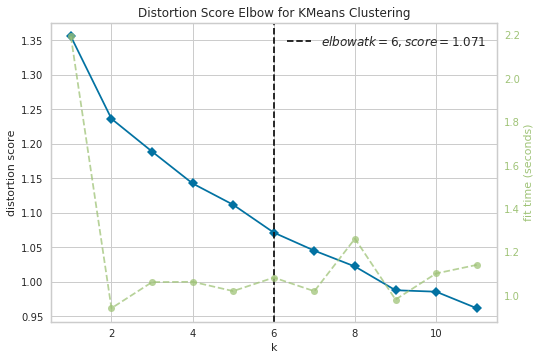

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(US_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Using Silhouette Score, best K = 3

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = list(range(2,11))

for n_clusters in range_n_clusters:
# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(US_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(US_grouped_clustering, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.08662855197915116
For n_clusters = 3 The average silhouette_score is : 0.03792142268796732
For n_clusters = 4 The average silhouette_score is : 0.049957759440635574
For n_clusters = 5 The average silhouette_score is : 0.0417968312927657
For n_clusters = 6 The average silhouette_score is : 0.043330553374489336
For n_clusters = 7 The average silhouette_score is : 0.033249529508912384
For n_clusters = 8 The average silhouette_score is : 0.031404731769402415
For n_clusters = 9 The average silhouette_score is : 0.022546548803795075
For n_clusters = 10 The average silhouette_score is : 0.027886249391143016


### Adding cluster label to dataframe of cities and top 10 venues

In [22]:
# add clustering labels
#city_venues_sorted=city_venues_sorted.drop('Cluster Labels', axis=1)
city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

US_merged = US_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
US_merged = US_merged.join(city_venues_sorted.set_index('City'), on='City')

US_merged.head() # check the last columns!

,City,lat,Long,State,population,pop density (people/sq mi),Land Area (sq mi),City Radius (km),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,40.6943,-73.9249,New York,19354922,28211,303,15.805061,4,Park,Brewery,Pizza Place,Bar,Yoga Studio,Pier,Gourmet Shop,Ice Cream Shop,Italian Restaurant,Japanese Restaurant
1,Los Angeles,34.1139,-118.4068,California,12815475,8484,469,19.663521,4,Hotel,Coffee Shop,Trail,Park,Farmers Market,Ice Cream Shop,Italian Restaurant,Café,Sandwich Place,Sushi Restaurant
2,Chicago,41.8373,-87.6862,Illinois,8675982,11883,228,13.710152,4,New American Restaurant,Hotel,Grocery Store,Deli / Bodega,Park,Coffee Shop,Café,Sandwich Place,Liquor Store,Yoga Studio
3,Miami,25.7839,-80.2102,Florida,6381966,12645,36,5.447862,4,Hotel,Seafood Restaurant,Mexican Restaurant,Grocery Store,Art Gallery,Coffee Shop,Brewery,Sandwich Place,Asian Restaurant,Park
5,Dallas,32.7936,-96.7662,Texas,5733259,3870,341,16.766872,2,Coffee Shop,Brewery,Park,Mexican Restaurant,Steakhouse,Grocery Store,Pizza Place,Burger Joint,Italian Restaurant,New American Restaurant


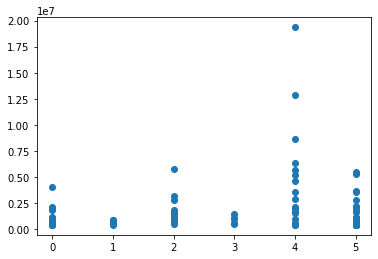

In [23]:
plt.scatter(y=US_merged['population'],x=US_merged['Cluster Labels'])

In [24]:
US_merged.head()

,City,lat,Long,State,population,pop density (people/sq mi),Land Area (sq mi),City Radius (km),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York,40.6943,-73.9249,New York,19354922,28211,303,15.805061,4,Park,Brewery,Pizza Place,Bar,Yoga Studio,Pier,Gourmet Shop,Ice Cream Shop,Italian Restaurant,Japanese Restaurant
1,Los Angeles,34.1139,-118.4068,California,12815475,8484,469,19.663521,4,Hotel,Coffee Shop,Trail,Park,Farmers Market,Ice Cream Shop,Italian Restaurant,Café,Sandwich Place,Sushi Restaurant
2,Chicago,41.8373,-87.6862,Illinois,8675982,11883,228,13.710152,4,New American Restaurant,Hotel,Grocery Store,Deli / Bodega,Park,Coffee Shop,Café,Sandwich Place,Liquor Store,Yoga Studio
3,Miami,25.7839,-80.2102,Florida,6381966,12645,36,5.447862,4,Hotel,Seafood Restaurant,Mexican Restaurant,Grocery Store,Art Gallery,Coffee Shop,Brewery,Sandwich Place,Asian Restaurant,Park
5,Dallas,32.7936,-96.7662,Texas,5733259,3870,341,16.766872,2,Coffee Shop,Brewery,Park,Mexican Restaurant,Steakhouse,Grocery Store,Pizza Place,Burger Joint,Italian Restaurant,New American Restaurant


In [24]:
city_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5,Akron,Mexican Restaurant,Park,Bar,American Restaurant,Diner,Italian Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Brewery
1,5,Albany,Coffee Shop,American Restaurant,Café,Pub,Ice Cream Shop,New American Restaurant,Hotel,Bar,Deli / Bodega,Burger Joint
2,2,Albuquerque,Brewery,Coffee Shop,Grocery Store,Mexican Restaurant,Park,Pizza Place,Café,American Restaurant,Restaurant,Vietnamese Restaurant
3,5,Allentown,Park,Pizza Place,Diner,Pub,Donut Shop,Italian Restaurant,Bar,American Restaurant,New American Restaurant,Pharmacy
4,4,Atlanta,Trail,Park,Mexican Restaurant,Pizza Place,Brewery,Ice Cream Shop,Wine Shop,Music Venue,Market,Seafood Restaurant


### Creating new map of clustered US cities

In [26]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4.25)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(US_merged['lat'], US_merged['Long'], US_merged['City'], US_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster) + ')', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

### Examining the Clusters

In [27]:
# Getting list of 0 cluster cities
US_0=US_merged.loc[US_merged['Cluster Labels']==0,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_0.head()
US_0[['City','State']]

,City,State
6,Phoenix,Arizona
30,Riverside,California
32,Las Vegas,Nevada
13,San Jose,California
16,Jacksonville,Florida
54,Raleigh,North Carolina
40,Louisville,Kentucky
38,Oklahoma City,Oklahoma
76,Birmingham,Alabama
61,Tulsa,Oklahoma


In [40]:
US_0['City'].count()

20

In [28]:
# 1
US_1=US_merged.loc[US_merged['Cluster Labels']==1,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_1.head()
US_1[['City','State']]

,City,State
46,Tucson,Arizona
28,El Paso,Texas
74,McAllen,Texas
47,Fresno,California
87,Concord,California
101,Mission Viejo,California
108,Baton Rouge,Louisiana
67,Bakersfield,California
119,Provo,Utah
64,Wichita,Kansas


In [42]:
US_1['City'].count()

11

In [29]:
# 2
US_2=US_merged.loc[US_merged['Cluster Labels']==2,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_2.head()
US_2[['City','State']]

,City,State
5,Dallas,Texas
10,San Diego,California
27,Denver,Colorado
37,Sacramento,California
41,Cleveland,Ohio
48,Kansas City,Missouri
22,Indianapolis,Indiana
26,Charlotte,North Carolina
43,Milwaukee,Wisconsin
59,Richmond,Virginia


In [44]:
US_2['City'].count()

14

In [30]:
# 3
US_3=US_merged.loc[US_merged['Cluster Labels']==3,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_3.head()
US_3[['City','State']]

,City,State
51,Virginia Beach,Virginia
62,New Orleans,Louisiana
65,Bridgeport,Connecticut
92,Springfield,Massachusetts
125,Palm Bay,Florida


In [46]:
US_3['City'].count()

5

In [31]:
# 4
US_4=US_merged.loc[US_merged['Cluster Labels']==4,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_4.head()
US_4[['City','State']]

,City,State
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Miami,Florida
7,Philadelphia,Pennsylvania
11,Atlanta,Georgia
12,Boston,Massachusetts
18,San Francisco,California
23,Minneapolis,Minnesota
31,St. Louis,Missouri


In [50]:
US_4['City'].count()

18

In [32]:
# 5
US_5=US_merged.loc[US_merged['Cluster Labels']==5,].drop(['lat','Long', 'Land Area (sq mi)', 'City Radius (km)'], axis=1)
US_5.head()
US_5[['City','State']]

,City,State
4,Houston,Texas
9,Washington,District of Columbia
15,Seattle,Washington
19,Detroit,Michigan
25,Tampa,Florida
29,Baltimore,Maryland
8,San Antonio,Texas
42,Pittsburgh,Pennsylvania
44,Cincinnati,Ohio
55,Providence,Rhode Island


In [51]:
US_5['City'].count()

32

In [33]:
# Getting distribution of top 10 venue results for each cluster 
list0 = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list_df = [[US_0, list0],[US_1, list1],[US_2, list2],[US_3, list3],[US_4, list4], [US_5, list5]]
for data in list_df:
    for i in range(5,15):
         data[1].extend(list(data[0].iloc[:,i]))

In [34]:
print(len(list0))
print(len(list1))
print(len(list2))
print(len(list3))
print(len(list4))
print(len(list5))

200
110
140
50
180
320


In [35]:
# cluster 0
df_0 = pd.DataFrame(list0)
df_0.columns=['Count']
df_0_count=pd.DataFrame(df_0['Count'].value_counts())
df_0_count.head(10)
df_0_prop=round(df_0_count/df_0_count.sum(),2).head(10)

Text(0.5, 1.0, 'Cluster 0')

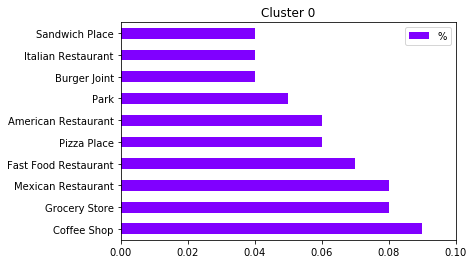

In [36]:
df_0_prop.plot(kind='barh', xlim=[0,0.1], color='#8000ff')
plt.legend('%')
plt.title('Cluster 0')

Text(0.5, 1.0, 'Cluster 1')

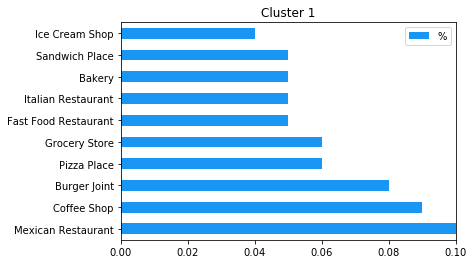

In [37]:
# cluster 1
df_1 = pd.DataFrame(list1)
df_1.columns=['Count']
df_1_count=pd.DataFrame(df_1['Count'].value_counts())
df_1_count.head()
df_1_prop=round(df_1_count/df_1_count.sum(),2).head(10)

df_1_prop.plot(kind='barh', xlim=[0,0.1], color='#1996f3')
plt.legend('%')
plt.title('Cluster 1')

Text(0.5, 1.0, 'Cluster 2')

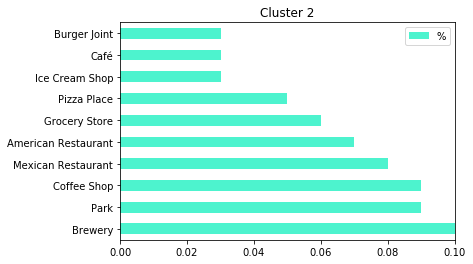

In [38]:
# 2
df_2 = pd.DataFrame(list2)
df_2.columns=['Count']
df_2_count=pd.DataFrame(df_2['Count'].value_counts())
df_2_count.head()
df_2_prop=round(df_2_count/df_2_count.sum(),2).head(10)
df_2_prop.plot(kind='barh', xlim=[0,0.1], color='#4df3ce')
plt.legend('%')
plt.title('Cluster 2')

Text(0.5, 1.0, 'Cluster 3')

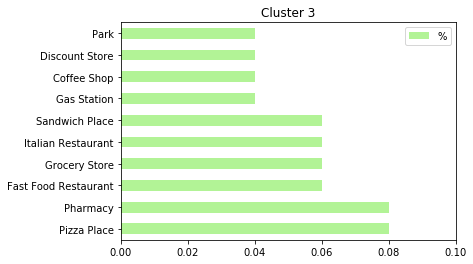

In [39]:
# 3
df_3 = pd.DataFrame(list3)
df_3.columns=['Count']
df_3_count=pd.DataFrame(df_3['Count'].value_counts())
df_3_count.head()
df_3_prop=round(df_3_count/df_3_count.sum(),2).head(10)
df_3_prop.plot(kind='barh', xlim=[0,0.1], color='#b2f396')
plt.legend('%')
plt.title('Cluster 3')

Text(0.5, 1.0, 'Cluster 4')

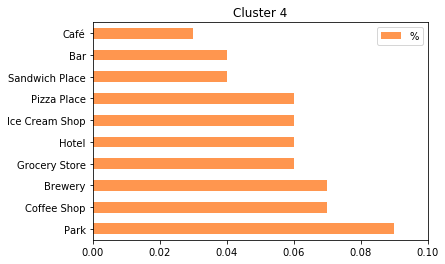

In [40]:
# 4
df_4 = pd.DataFrame(list4)
df_4.columns=['Count']
df_4_count=pd.DataFrame(df_4['Count'].value_counts())
df_4_count.head(10)
df_4_prop=round(df_4_count/df_4_count.sum(),2).head(10)
df_4_prop.plot(kind='barh', xlim=[0,0.1], color='#ff964f')
plt.legend('%')
plt.title('Cluster 4')

Text(0.5, 1.0, 'Cluster 5')

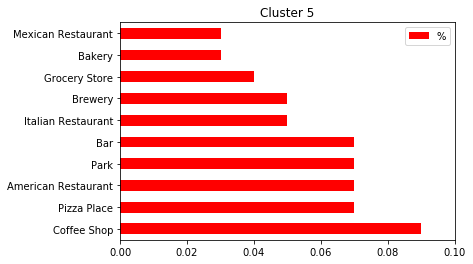

In [41]:
# 5
df_5 = pd.DataFrame(list5)
df_5.columns=['Count']
df_5_count=pd.DataFrame(df_5['Count'].value_counts())
df_5_count.head(10)
df_5_prop=round(df_5_count/df_5_count.sum(),2).head(10)
df_5_prop.plot(kind='barh', xlim=[0,0.1], color='#ff0000')
plt.legend('%')
plt.title('Cluster 5')